# STAT 207 Lab 5 - Individual Part - [25 total points] - Solutions

## Central Limit Theorem and Confidence Intervals

Due: Tuesday, March 28 11:59pm CST



## <u>Case Studies</u>: U.S. County Unemployment Rate and Median Education Levels
In this lab we will explore the statistical concepts that we've learned this week while also examining the **unemployment rates** and the **median education levels** of the counties in the U.S.

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
from scipy.stats import norm
from statistics import mean

### 1. Data Processing and Cleaning

#### 1.1. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

This dataset has missing values! Specifically, the phrase 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [5]:
df = pd.read_csv('county.csv')

#### 1.2. [0.25pt] Display the shape of the dataframe.

In [6]:
df.shape

(3142, 15)

In [7]:
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


#### 1.3. [0.5 pt] How many missing values does the unemployment rate variable have? How many missing values does the median_edu variable have?

In [8]:
missing_values = ["data unavailable"]
df_1 = pd.read_csv('county.csv', 
                   na_values=missing_values)
df_1.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [9]:
df_1['unemployment_rate'].isna().sum()

3

In [10]:
df_1['median_edu'].isna().sum()

2

#### 1.4. [0.5 pt] Clean the dataframe.

Create a pandas dataframe that is comprised of just the unemployment rate and the median_edu columns. Then drop all rows in this dataframe that have missing values.

<u>Hint</u>: *Section 4.1.1 in the Unit 9 notebook can be useful for this part.*

In [11]:
df_unemploy_edu = df_1[['unemployment_rate', 'median_edu']]
df_new = df_unemploy_edu.dropna()

#### 1.5. [0.25 pt] Display the shape of this new dataframe you created in 1.4.

In [12]:
df_new.shape

(3139, 2)

In [13]:
df_new.head()

,unemployment_rate,median_edu
0,3.86,some_college
1,3.99,some_college
2,5.90,hs_diploma
3,4.39,hs_diploma
4,4.02,hs_diploma


## 2. <u>Central Limit Theorem (for Sample Means) Exploration</u>

### 2.1. *Population* of County Unemployment Rates

Let's assume that thist cleaned dataframe represents a **population** of all U.S. counties.

#### 2.1.1. [0.5 pt] Calculate the population mean and the population standard deviation unemployment rates.

In [14]:
unemploy_popu_mean = df_new['unemployment_rate'].mean()
unemploy_popu_mean

4.611443134756305

In [15]:
unemploy_popu_std = df_new['unemployment_rate'].std()
unemploy_popu_std

1.6487610856225392

In [16]:
n_unemploy= df_new.shape[0]
n_unemploy

3139

#### 2.1.2.  [0.5 pt] Plot the population distribution of unemployment rates in a histogram.

Make sure you label your x-axis and title appropriately.

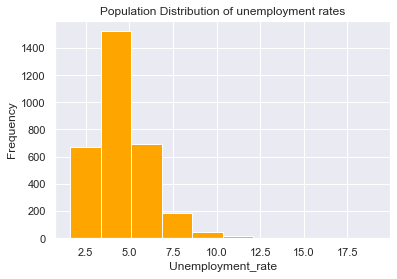

In [17]:
df_new['unemployment_rate'].hist(color='orange')
plt.title('Population Distribution of unemployment rates')
plt.xlabel('Unemployment_rate')
plt.ylabel('Frequency')
plt.show()

### 2.2. *Random Sample* of County Unemployment Rates

#### 2.2.1. [0.5 pt] Collect a random sample of size 50 from this population (using a random state of 101) WITHOUT replacement.

In [18]:
unemploy_sample = df_new['unemployment_rate'].sample(n=50, replace = False, random_state = 101)

#### 2.2.2.  [0.5 pt]  Calculate the mean and standard deviation of this sample.

In [19]:
unemploy_sample_mean = unemploy_sample.mean()
unemploy_sample_mean

5.0280000000000005

In [20]:
unemploy_sample_std = unemploy_sample.std()
unemploy_sample_std

1.598841417261581

#### 2.2.3.  [0.5 pt]  Plot the sample distribution of unemployment rates in a histogram.

Make sure that you label the x-axis and title appropriately.

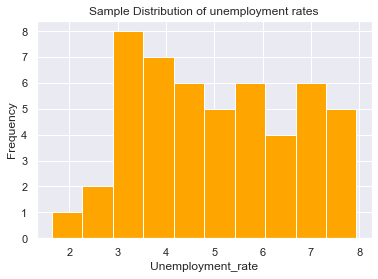

In [21]:
unemploy_sample.hist(color='orange')
plt.title('Sample Distribution of unemployment rates')
plt.xlabel('Unemployment_rate')
plt.ylabel('Frequency')
plt.show()

### 2.3. Sampling Distribution - *Theoretical*

Suppose we were to create a sampling distribution with many, many sample means unemployment rates, where each sample was of size 50 (drawn with replacement from the population of all county unemployment rates).

#### 2.3.1.  [1 pt]  What would we *expect* the mean of this *theoretical* sampling distribution to be?

<u>Hint</u>: *In this part, we are not actually looking for you to calculate the mean of an **actual** sampling distribution.*

<u>Hint</u>: *In this part, you should assume that you know the population parameters.*

The mean of theoretical mean should be close to the population mean.

#### 2.3.2  [1 pt]  What would we *expect* the standard deviation of this *theoretical* sampling distribution to be?

<u>Hint</u>: *In this part, we are not actually looking for you to calculate the standard deviation of an **actual** sampling distribution.*

<u>Hint</u>: *In this part, you should assume that you know the population parameters.*

The std of theoretical std should be close to the population std.

#### 2.3.3.  [0.75 pt]  Will this sampling distribution of sample means be approximately normal? Explain why.

Yes. Because due to the CLT, the sample size of 50 is greater than30.

#### 2.3.4.  [0.5 pt]  Calculate the probability that a randomly selected sample mean unemployment rate (from this sampling distribution) is greater than or equal to the sample mean that we calculated in (2.2.2). 

In [22]:
p1 = 1 - norm.cdf(unemploy_sample_mean, loc=unemploy_popu_mean, scale=unemploy_popu_std)
p1

0.4002699591000949

2.3.5.

In [23]:
(unemploy_sample_mean-unemploy_popu_mean)/unemploy_popu_std

0.25264840908494135

#### 2.3.6. [0.5 pt] Calculate the probability that a randomly selected sample mean (from this sampling distribution) is less than or equal to the sample mean that we calculated in (2.3.5.). 

In [24]:
p2 = norm.cdf(unemploy_sample_mean, loc=unemploy_popu_mean, scale=unemploy_popu_std)
p2

0.5997300408999051

### 2.4. Sampling Distribution - *Actual*

#### 2.4.1 [1 pt] Create an actual sampling distribution

Now, using your population of county unemployment rates, create an **actual sampling distribution** of sample mean unemployment rates. We would like our sampling distribution to contain 1000 sample means, each calculated on samples of size 50.


In [25]:
samples = []
box1 =[]
box2 = []
for i in range(1000):
    sample = df_new['unemployment_rate'].sample(n=50, replace = False)
    samples.append(sample)
    s_mean = sample.mean()
    s_std = sample.std()
    box1.append(s_mean)
    box2.append(s_std)

#### 2.4.2 [0.5 pt] Calculate the mean and the standard deviation of this sampling distribution you *actually* created in 2.4.1.

In [26]:
sampling_mean = mean(box1)
sampling_mean

4.6125954

In [27]:
sampling_std = np.std(box2)
sampling_std

0.3487698713076267

#### 2.4.3. [0.25 pt] How do these values compare to the sampling distribution mean and the standard deviation that you *theoretically* calculated in 2.3.1 and 2.3.2?

The theoretical mean is 4.611443134756305 and the actual one is 4.624346

The theroretical std is 1.6487610856225392, and the actual one is 0.3363776160283187, big difference

#### 2.4.4. [0.25 pt] Plot the histogram of this sampling distribution.

Make sure to appropriately label the x-axis and title of this plot.

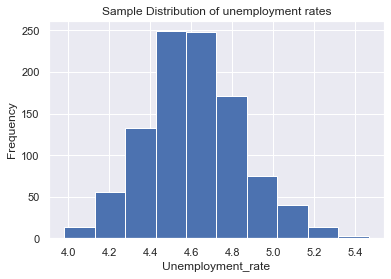

In [28]:
plt.hist(box1)
plt.title('Sample Distribution of unemployment rates')
plt.xlabel('Unemployment_rate')
plt.ylabel('Frequency')
plt.show()

## 3. Confidence Intervals for a Population Mean

While we technically have the population of all U.S. county unemployment rates (and can therefore *actually* calculate the population mean), we would still like to calculate a confidence interval for this population mean to learn more about how confidence intervals behave. (By having a population, it allows us to "check" our answers to see how well our confidence intervals did.)

### 3.1. Constructing a Single 92% Confidence Interval for Population Mean Unemployment
First, we would like to construct a *single* 92% confidence interval for the average unemployment rate of ALL U.S. counties.

#### 3.1.1.  [0.5 pt]  Check the conditions for creating a confidence interval for average unemployment rate of ALL U.S. counties.

- The observations are independent
- n>30 

#### 3.1.2.  [2.25 pt] Now create this 92% confidence interval using the random sample that you collected in 2.2.

**ASSUME THAT YOU DO NOT KNOW WHAT THE POPULATION STANDARD DEVIATION UNEMPLOYMENT RATE IS.**

In [29]:
critical_value=norm.ppf(0.96)
critical_value

1.7506860712521692

In [30]:
unemploy_sample = df_new['unemployment_rate'].sample(n=50, replace = False, random_state = 101)
lb = unemploy_sample.mean()-critical_value*(unemploy_sample.std()/np.sqrt(50))
ub = unemploy_sample.mean()+critical_value*(unemploy_sample.std()/np.sqrt(50))
print(lb, ub)

4.632151809342855 5.423848190657146


#### 3.1.3 [0.75 pt]  Now put this confidence interval into words.

We are 92% confident that the average unemployment rate of all adults living in the U.S. (ie.  𝜇 ) is between 4.63 and 5.42.

#### 3.1.4  [0.5 pt] Check your answer.
Because we *actually* know the unemployment rate of all U.S. counties, check whether this population mean falls within this confidence interval you just calculated.

It's 4.61%

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

#### <u> Tutorial</u> ANDS and ORS in if-statements

We can check multiple conditions in an if-statement by using the 'and' and the 'or' operators as shown below.


In [31]:
a=20

if a < 30 and a>10:
    print('a is between 10 and 30')
else:
    print('otherwise')

a is between 10 and 30


In [32]:
if a >= 30 or a <=10:
    print('a is at most 10 or at least 30')
else:
    print('otherwise')

otherwise


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 3.2. Constructing Many 92% Confidence Intervals for Population Mean Unemployment
Next, let's construct 1000 92% confidence intervals for the average unemployment rate of ALL U.S. counties.

#### 3.2.1  [1.5 pt] Create a function that does the following.
* <u>Input</u> The input for your function should take in the following values.
    - a lower bound of a confidence interval
    - an upper bound of a confidence interval
    - a population mean $\mu$
* <u>What it does</u>
    - Your function should check whether $lower \: bound\leq \mu\leq upper\: bound$.
    - If this is the case, it should return True
    - If this is not the case, then it should return False.

In [33]:
def ci(lb, ub, mean):
    if lb < mean and ub > mean:
        return True
    else:
        return False

#### 3.2.2  [0.5 pt]  Test your function out using the population mean and the confidence interval from 3.1.

In [34]:
ci(lb, ub, unemploy_popu_mean)

False

#### 3.2.3.  [1.5 pt]  Use your function above to do the following:
* Collect 1000 random samples (each of size 50 without replacement) from the population of all U.S. county unemployment rates.
* Calculate the sample mean unemployment rate and sample standard deviation of each of these random samples.
* Create a 92% confidence interval around each of these sample means (assume that you don't know the population standard deviation).

**What percent of these 1000 confidence intervals *actually* contained the population mean unemployment rate?**

In [35]:
ci_box = []
for i in range(1000):
    sample = df_new['unemployment_rate'].sample(n=50, replace = False)
    c_v = norm.ppf(0.96)
    lb=sample.mean()-c_v*(sample.std()/np.sqrt(50))
    ub=sample.mean()+c_v*(sample.std()/np.sqrt(50))
    ci_box.append(ci(lb, ub, unemploy_popu_mean))

In [36]:
ci_box.count(True)

896

In [37]:
884/1000

0.884

#### 3.2.4.  [0.25 pt]  What is the difference between this percentage from (3.2.3) and your confidence level?

The percentage only have 88.4%, which is lower than the confidence level.

## 4. <u>Central Limit Theorem (for Sample Proportions) Exploration</u>

### 4.1. *Population* of County Median Education Levels

Let's assume that the median education level in this cleaned dataset represents a **population**, where the population is the median education level of ALL counties in the U.S.

#### 4.1.1. [0.5 pt] Calculate the population proportion of counties in the U.S. that have 'some_college' as the median education level.

In [38]:
edu_df = df_new['median_edu']
edu_df

0       some_college
1       some_college
2         hs_diploma
3         hs_diploma
4         hs_diploma
            ...     
3137    some_college
3138       bachelors
3139    some_college
3140    some_college
3141    some_college
Name: median_edu, Length: 3139, dtype: object

In [39]:
college_df = df_new[df_new['median_edu']=='some_college']
college_df

,unemployment_rate,median_edu
0,3.86,some_college
1,3.99,some_college
7,4.93,some_college
15,4.39,some_college
16,5.21,some_college
...,...,...
3136,4.37,some_college
3137,4.55,some_college
3139,4.50,some_college
3140,4.08,some_college


In [40]:
1694/3139

0.5396623128384836

### 4.2. *Random Sample* of County Median Education Levels

#### 4.2.1. [0.5 pt] Collect a random sample of 40 counties from this population (using a random state of 101) WITHOUT replacement.

In [41]:
edu_sample = edu_df.sample(n=40, replace=False, random_state=101)
edu_sample

1294    some_college
960     some_college
105     some_college
692     some_college
502       hs_diploma
1824    some_college
335     some_college
2510    some_college
6         hs_diploma
649     some_college
248     some_college
982     some_college
3057    some_college
2269      hs_diploma
3014      hs_diploma
2931      hs_diploma
2646      hs_diploma
732       hs_diploma
1501    some_college
2514      hs_diploma
60        hs_diploma
45        hs_diploma
879     some_college
2630      hs_diploma
2550      hs_diploma
2533    some_college
2192    some_college
558     some_college
3046      hs_diploma
2189      hs_diploma
2901      hs_diploma
666     some_college
1852      hs_diploma
1938    some_college
2445      hs_diploma
222     some_college
2008    some_college
2527    some_college
1539      hs_diploma
1117      hs_diploma
Name: median_edu, dtype: object

#### 4.2.2.  [0.5 pt]  Calculate the proportion of counties in this sample that have a median education level of 'some_college.'

In [42]:
edu_sample.value_counts()

some_college    21
hs_diploma      19
Name: median_edu, dtype: int64

In [43]:
21/40

0.525

### 4.3. Sampling Distribution - *Theoretical*

Suppose we were to create a sampling distribution with many, many proportions of counties in a sample that had a median education level of 'some_college'. Specifically, in this sampling distribution, each sample was of size 40 (drawn with replacement from the population of all county median education levels).

#### 4.3.1.  [1 pt]  What would we *expect* the mean of this *theoretical* sampling distribution to be?

<u>Hint</u>: *In this part, we are not actually looking for you to calculate the mean of an **actual** sampling distribution.*

<u>Hint</u>: *In this part, you can assume that you know what the population proportion p is.*

It should be close to the population mean. 

#### 4.3.2  [1 pt]  What would we *expect* the standard deviation of this *theoretical* sampling distribution to be?

<u>Hint</u>: *In this part, we are not actually looking for you to calculate the standard deviation of an **actual** sampling distribution.*

<u>Hint</u>: *In this part, you can assume that you know what the population proportion p is.*

It should be close to the population std.

## <u>5. Confidence Interval for a Population Proportion</u>

### 5.1. Confidence Interval for the Proportion of All U.S. Counties that have Median Education Level of Some College

Finally, we would like to create a 98% confidence interval for the proportion of all U.S. counties that have a median education level of some college.

#### 5.1.1. [0.75 pt] Check the conditions for creating a confidence interval for the proportion of all U.S. counties that have median education level of some college.

*Important: You should no longer assume that you know what the population proportion p is in this part.*




- The observations are independent
- n>30 

#### 5.1.2. [2.25 pt] Create a 98% confidence interval for the proportion of all U.S. counties that have median education level of some college.

In [44]:
critical_v = norm.ppf(0.99)

In [45]:
l_b = 0.525 - critical_v*((0.525*(1-0.525))**0.5/np.sqrt(50))
u_b = 0.525 + critical_v*((0.525*(1-0.525))**0.5/np.sqrt(50))

In [46]:
print(l_b, u_b)

0.36070811500599453 0.6892918849940055


#### 5.1.3. [0.25 pt] Put your confidence interval into words.

We are 99% confident that the proportion of all U.S. counties that have median education level of some college is between 0.361 and 0.689.